In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from textblob import TextBlob
import ast

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor


from sklearn.metrics import r2_score

In [49]:
df=pd.read_csv('TA_restaurants_curated.csv')
df

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170
...,...,...,...,...,...,...,...,...,...,...,...
125522,1662,Konrad Kaffee- & Cocktailbar,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13273526-Reviews-K...,d13273526
125523,1663,Blueberry American Bakery,Zurich,['Cafe'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13292844-Reviews-B...,d13292844
125524,1664,Restaurant Bahnhof,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13296092-Reviews-R...,d13296092
125525,1665,Yoyo Pizza,Zurich,['Fast Food'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13323362-Reviews-Y...,d13323362


In [61]:
df.dtypes

Unnamed: 0             int64
Name                  object
City                  object
Cuisine Style         object
Ranking              float64
Rating               float64
Price Range           object
Number of Reviews    float64
Reviews               object
URL_TA                object
ID_TA                 object
dtype: object

In [62]:
df.shape

(125527, 11)

In [50]:
# We are excluding these rows as it contains "nan" in values along with the data and it throws error when we try to 
# extract the string 
Exclude_List = ['d3589386','d10681569','d717825','d1576770','d1982662']

In [51]:
df = df[~df['ID_TA'].isin(Exclude_List)]

In [52]:
df.shape

(125522, 11)

In [53]:
# Replacing the pure "NaN" values with blank array

df['Reviews'].fillna('[[], []]',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [54]:
# Extracting the reviews string from the data

df['Reviews'] = df['Reviews'].apply(ast.literal_eval).str[0].str.join(',')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df.head()

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"Just like home,A Warm Welcome to Wintry Amsterdam",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"Great food and staff,just perfect",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"Satisfaction,Delicious old school restaurant",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"True five star dinner,A superb evening of fine...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"Best meal.... EVER,super food experience",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [56]:
# Removing the unique columns

df.drop(['Unnamed: 0','ID_TA','URL_TA','Name'],axis=1,inplace=True)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews
0,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"Just like home,A Warm Welcome to Wintry Amsterdam"
1,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"Great food and staff,just perfect"
2,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"Satisfaction,Delicious old school restaurant"
3,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"True five star dinner,A superb evening of fine..."
4,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"Best meal.... EVER,super food experience"


In [57]:
df['Price Range'].isnull().sum()

47855

In [58]:
# Checking the distinct values for Price Range

pr = df['Price Range'].unique()
pr

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

In [59]:
# Converting it into numeric

def price_band(x):
    for i in pr:
        if i == '$$$$':
            return 4
        elif i == '$':
            return 1
        elif i == '$$ - $$$':
            return 2.5
        elif i == '$$':
            return 2
        elif i == '$$$':
            return 3
        else:
            return 2.5


In [60]:
df['Price Range'] = df['Price Range'].apply(price_band)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
df['City'].unique()

array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Bratislava',
       'Brussels', 'Budapest', 'Copenhagen', 'Dublin', 'Edinburgh',
       'Geneva', 'Hamburg', 'Helsinki', 'Krakow', 'Lisbon', 'Ljubljana',
       'London', 'Luxembourg', 'Lyon', 'Madrid', 'Milan', 'Munich',
       'Oporto', 'Oslo', 'Paris', 'Prague', 'Rome', 'Stockholm', 'Vienna',
       'Warsaw', 'Zurich'], dtype=object)

In [62]:
# Since we have many unique cities we are only considering top 10 with highest frequencies

top_10 = df['City'].value_counts().nlargest(10)
top_10



London       18212
Paris        14874
Madrid        9543
Barcelona     8424
Berlin        7078
Milan         6687
Rome          5949
Prague        4859
Lisbon        3986
Vienna        3724
Name: City, dtype: int64

In [63]:
# Extracting the top 10 city names

top_city=pd.DataFrame(top_10.index,columns=['City'])
top_city_names=top_city['City'].to_list()
top_city_names

['London',
 'Paris',
 'Madrid',
 'Barcelona',
 'Berlin',
 'Milan',
 'Rome',
 'Prague',
 'Lisbon',
 'Vienna']

In [64]:
# Label Encoding the values by creating columns for each cities

for cols in top_city_names:
    df[cols + str('_City')]=np.where(df['City'] == cols, 1,0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df.drop(['City'],inplace=True,axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
df.head()

,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,London_City,Paris_City,Madrid_City,Barcelona_City,Berlin_City,Milan_City,Rome_City,Prague_City,Lisbon_City,Vienna_City
0,"['French', 'Dutch', 'European']",1.0,5.0,2.5,136.0,"Just like home,A Warm Welcome to Wintry Amsterdam",0,0,0,0,0,0,0,0,0,0
1,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,2.5,812.0,"Great food and staff,just perfect",0,0,0,0,0,0,0,0,0,0
2,"['Mediterranean', 'French', 'International', '...",3.0,4.5,2.5,567.0,"Satisfaction,Delicious old school restaurant",0,0,0,0,0,0,0,0,0,0
3,"['French', 'European', 'International', 'Conte...",4.0,5.0,2.5,564.0,"True five star dinner,A superb evening of fine...",0,0,0,0,0,0,0,0,0,0
4,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,2.5,316.0,"Best meal.... EVER,super food experience",0,0,0,0,0,0,0,0,0,0


In [67]:
# Extracting the unique Cuisine Styles

Cuisine_List = ['Asian', 'Italian', 'French', 'American', 'Indian', 'Dutch', 'Bar', 'Seafood', 'Fast Food', 'Mediterranean', 'Sushi', 'European', 'Spanish', 'Korean', 'Turkish', 'Grill', 'Vietnamese', 'Street Food', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']

In [68]:
# Label Encoding the values by creating columns for each Cuisine

for cols in Cuisine_List:
    df[cols +str('_CUS')]=np.where(df['Cuisine Style'].str.contains(cols), 1,0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
df.drop(['Cuisine Style'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
df.head()

,Ranking,Rating,Price Range,Number of Reviews,Reviews,London_City,Paris_City,Madrid_City,Barcelona_City,Berlin_City,...,European_CUS,Spanish_CUS,Korean_CUS,Turkish_CUS,Grill_CUS,Vietnamese_CUS,Street Food_CUS,Vegetarian Friendly_CUS,Vegan Options_CUS,Gluten Free Options_CUS
0,1.0,5.0,2.5,136.0,"Just like home,A Warm Welcome to Wintry Amsterdam",0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2.0,4.5,2.5,812.0,"Great food and staff,just perfect",0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,3.0,4.5,2.5,567.0,"Satisfaction,Delicious old school restaurant",0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3,4.0,5.0,2.5,564.0,"True five star dinner,A superb evening of fine...",0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
4,5.0,4.5,2.5,316.0,"Best meal.... EVER,super food experience",0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1


In [71]:
# Removing the special characters from the reviews

df['Reviews'] =df['Reviews'].str.replace(('\W+'),' ')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
df.head(2)

,Ranking,Rating,Price Range,Number of Reviews,Reviews,London_City,Paris_City,Madrid_City,Barcelona_City,Berlin_City,...,European_CUS,Spanish_CUS,Korean_CUS,Turkish_CUS,Grill_CUS,Vietnamese_CUS,Street Food_CUS,Vegetarian Friendly_CUS,Vegan Options_CUS,Gluten Free Options_CUS
0,1.0,5.0,2.5,136.0,Just like home A Warm Welcome to Wintry Amsterdam,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2.0,4.5,2.5,812.0,Great food and staff just perfect,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [73]:
# Converting all the reviews to lower case 
df['Reviews'] =df['Reviews'].str.lower()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
df.head(2)

,Ranking,Rating,Price Range,Number of Reviews,Reviews,London_City,Paris_City,Madrid_City,Barcelona_City,Berlin_City,...,European_CUS,Spanish_CUS,Korean_CUS,Turkish_CUS,Grill_CUS,Vietnamese_CUS,Street Food_CUS,Vegetarian Friendly_CUS,Vegan Options_CUS,Gluten Free Options_CUS
0,1.0,5.0,2.5,136.0,just like home a warm welcome to wintry amsterdam,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2.0,4.5,2.5,812.0,great food and staff just perfect,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [75]:
# Removing the stop words
stop = stopwords.words('english')
df['Reviews'] =df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
df.head(2)

,Ranking,Rating,Price Range,Number of Reviews,Reviews,London_City,Paris_City,Madrid_City,Barcelona_City,Berlin_City,...,European_CUS,Spanish_CUS,Korean_CUS,Turkish_CUS,Grill_CUS,Vietnamese_CUS,Street Food_CUS,Vegetarian Friendly_CUS,Vegan Options_CUS,Gluten Free Options_CUS
0,1.0,5.0,2.5,136.0,like home warm welcome wintry amsterdam,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2.0,4.5,2.5,812.0,great food staff perfect,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [77]:
# Stemming the reviews
st = PorterStemmer()
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
df.head(2)

,Ranking,Rating,Price Range,Number of Reviews,Reviews,London_City,Paris_City,Madrid_City,Barcelona_City,Berlin_City,...,European_CUS,Spanish_CUS,Korean_CUS,Turkish_CUS,Grill_CUS,Vietnamese_CUS,Street Food_CUS,Vegetarian Friendly_CUS,Vegan Options_CUS,Gluten Free Options_CUS
0,1.0,5.0,2.5,136.0,like home warm welcom wintri amsterdam,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2.0,4.5,2.5,812.0,great food staff perfect,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [79]:
# Sentimental analysis for the reviews

def senti(x):
    return TextBlob(x).sentiment.polarity

In [80]:
df['Sentiment'] = df["Reviews"].apply(senti).round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
df.head()

,Ranking,Rating,Price Range,Number of Reviews,Reviews,London_City,Paris_City,Madrid_City,Barcelona_City,Berlin_City,...,Spanish_CUS,Korean_CUS,Turkish_CUS,Grill_CUS,Vietnamese_CUS,Street Food_CUS,Vegetarian Friendly_CUS,Vegan Options_CUS,Gluten Free Options_CUS,Sentiment
0,1.0,5.0,2.5,136.0,like home warm welcom wintri amsterdam,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.60
1,2.0,4.5,2.5,812.0,great food staff perfect,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0.90
2,3.0,4.5,2.5,567.0,satisfact delici old school restaur,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0.10
3,4.0,5.0,2.5,564.0,true five star dinner superb even fine dine ho...,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0.59
4,5.0,4.5,2.5,316.0,best meal ever super food experi,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0.67


In [82]:
df.drop(['Reviews'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [83]:
df.isnull().sum()

Ranking                     9651
Rating                      9630
Price Range                    0
Number of Reviews          17344
London_City                    0
Paris_City                     0
Madrid_City                    0
Barcelona_City                 0
Berlin_City                    0
Milan_City                     0
Rome_City                      0
Prague_City                    0
Lisbon_City                    0
Vienna_City                    0
Asian_CUS                      0
Italian_CUS                    0
French_CUS                     0
American_CUS                   0
Indian_CUS                     0
Dutch_CUS                      0
Bar_CUS                        0
Seafood_CUS                    0
Fast Food_CUS                  0
Mediterranean_CUS              0
Sushi_CUS                      0
European_CUS                   0
Spanish_CUS                    0
Korean_CUS                     0
Turkish_CUS                    0
Grill_CUS                      0
Vietnamese

In [84]:
df.describe()

,Ranking,Rating,Price Range,Number of Reviews,London_City,Paris_City,Madrid_City,Barcelona_City,Berlin_City,Milan_City,...,Spanish_CUS,Korean_CUS,Turkish_CUS,Grill_CUS,Vietnamese_CUS,Street Food_CUS,Vegetarian Friendly_CUS,Vegan Options_CUS,Gluten Free Options_CUS,Sentiment
count,115871.000000,115892.000000,125522.0,108178.000000,125522.000000,125522.000000,125522.000000,125522.000000,125522.000000,125522.000000,...,125522.000000,125522.000000,125522.000000,125522.000000,125522.000000,125522.000000,125522.000000,125522.000000,125522.000000,125522.000000
mean,3657.565853,3.987437,2.5,125.187376,0.145090,0.118497,0.076027,0.067112,0.056389,0.053274,...,0.315252,0.253820,0.261046,0.262448,0.262305,0.256752,0.507560,0.353404,0.346322,0.305977
std,3706.301351,0.678827,0.0,310.839962,0.352193,0.323197,0.265042,0.250216,0.230671,0.224579,...,0.464618,0.435198,0.439207,0.439967,0.439889,0.436843,0.499945,0.478029,0.475799,0.357048
min,1.000000,-1.000000,2.5,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,965.000000,3.500000,2.5,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2256.000000,4.000000,2.5,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.250000
75%,5237.000000,4.500000,2.5,114.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.630000
max,16444.000000,5.000000,2.5,16478.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
# Replacing the missing values

for cols in ['Ranking','Rating','Number of Reviews']:
    mean=df[cols].mean()
    df[cols].fillna(mean,inplace=True)

df.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Ranking                    0
Rating                     0
Price Range                0
Number of Reviews          0
London_City                0
Paris_City                 0
Madrid_City                0
Barcelona_City             0
Berlin_City                0
Milan_City                 0
Rome_City                  0
Prague_City                0
Lisbon_City                0
Vienna_City                0
Asian_CUS                  0
Italian_CUS                0
French_CUS                 0
American_CUS               0
Indian_CUS                 0
Dutch_CUS                  0
Bar_CUS                    0
Seafood_CUS                0
Fast Food_CUS              0
Mediterranean_CUS          0
Sushi_CUS                  0
European_CUS               0
Spanish_CUS                0
Korean_CUS                 0
Turkish_CUS                0
Grill_CUS                  0
Vietnamese_CUS             0
Street Food_CUS            0
Vegetarian Friendly_CUS    0
Vegan Options_CUS          0
Gluten Free Op

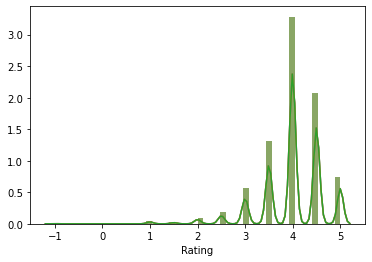

In [98]:
#All_Cols = df.columns

for all_cols in ['Rating','Ranking','Number of Reviews']:
    sns.distplot(df['Rating'])

In [86]:
# Splitting the data into dependent and independent variables

all_cols=df.columns.tolist()
all_cols = [c for c in all_cols if c not in ['Rating']]
target = 'Rating'
state = np.random.RandomState(21)
x = df[all_cols]
y = df[target]

print(x.shape)
print(y.shape)

(125522, 35)
(125522,)


In [87]:
# Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)

In [44]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

r2_score(y_test,y_pred)

0.2448010165244644

In [101]:
#Prepairng a Decision Tree Regression

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

r2_score(y_test,y_predict)

0.5964474689386612

In [88]:
#Preparing Random Forest REgression

RForest=RandomForestRegressor(n_estimators=500,random_state=21,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

r2_score(y_test,y_predict)

0.6609446321410944

In [103]:
#Preparing Extra Tree Regression

ETree=ExtraTreesRegressor(n_estimators = 100, random_state=21)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)


r2_score(y_test,y_predict)

0.5916849343127364

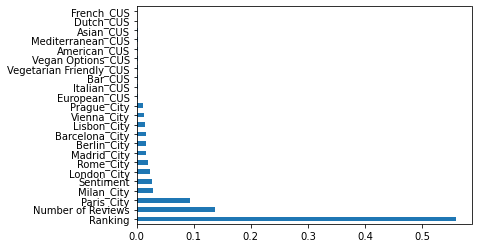

In [104]:
(pd.Series(DTree.feature_importances_, index=x_test.columns)
   .nlargest(23)
   .plot(kind='barh'))  

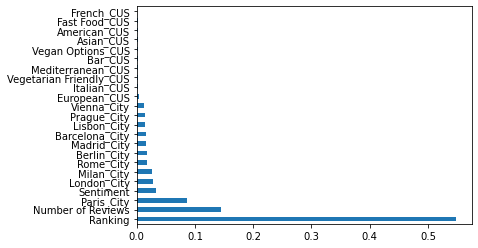

In [105]:
(pd.Series(RForest.feature_importances_, index=x_test.columns)
   .nlargest(23)
   .plot(kind='barh'))  

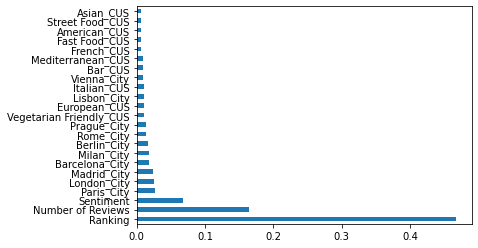

In [106]:
(pd.Series(ETree.feature_importances_, index=x_test.columns)
   .nlargest(23)
   .plot(kind='barh'))  

In [89]:
# Extracting best features from train

x_train_best_feat = x_train[['Ranking','Number of Reviews','Paris_City','Sentiment','London_City','Milan_City','Rome_City','Berlin_City','Madrid_City','Barcelona_City','Lisbon_City','Prague_City','Vienna_City']]

In [90]:
# Extracting best features from test

x_test_best_feat = x_test[['Ranking','Number of Reviews','Paris_City','Sentiment','London_City','Milan_City','Rome_City','Berlin_City','Madrid_City','Barcelona_City','Lisbon_City','Prague_City','Vienna_City']]

In [96]:
#bulk = x_train_best_feat.head()
#bulk.to_excel(r'bulk.xlsx')

In [91]:
# Fitting the data with best features

RForest.fit(x_train_best_feat,y_train)
y_predict=RForest.predict(x_test_best_feat)

r2_score(y_test,y_predict)

0.6546173577450984

In [40]:
# Hyper Tuning parameters for Random Forest

param_rf={'n_estimators':[500,700,1000],
          'max_features':[5,9,12],
          'bootstrap':[True,False],
          'criterion':['mse','mae'],
          'max_depth':[None,5,10,15],
          'min_samples_leaf':[1,2,5,10],
          'min_samples_split':[2,5,10]
         }

In [41]:
RF=RandomForestRegressor(verbose=3,n_jobs=-1)

In [42]:
RF_Rand=RandomizedSearchCV(RF,scoring='r2',param_distributions=param_rf,cv=10)

In [43]:
RF_Rand.fit(x_train_best_feat,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   34.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   32.1s finished
[

KeyboardInterrupt: 

In [ ]:
best_parameters = RF_Rand.best_params_
print(best_parameters)

In [ ]:
best_rf= RandomForestClassifier(Copy paste)

In [ ]:
y_test_pred=best_rf.predict(x_test)

accuracy_score(y_test,y_test_pred)

In [12]:
import pickle

In [14]:
filename = 'Rest_Rate_model.pickle'

#pickle.dump(RForest, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [15]:
# Trying a random prediction

pred=loaded_model.predict([[1,200,0,0,0.7,1,0,0,0,0,0,0,0]])
print('The restaurant rating is :',pred[0])

The restaurant rating is : 4.8604719953919755
